In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

plt.rcParams.update({'font.size': 10})
#Charon
import sys
sys.path.append("/data/user/tchau/Sandbox/GC_OscNext/Spectra")
from NuSpectra import *

<font color="darkmagenta"> Spectra from DM annihilation/decay </font>

In [6]:
# Create NuRate object:
mass=500
channel="nuenue"
process="ann"
Rate = NuSpectra(mass, channel, process, logscale=False)
Rate.nodes=100
Rate.bins=100


Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


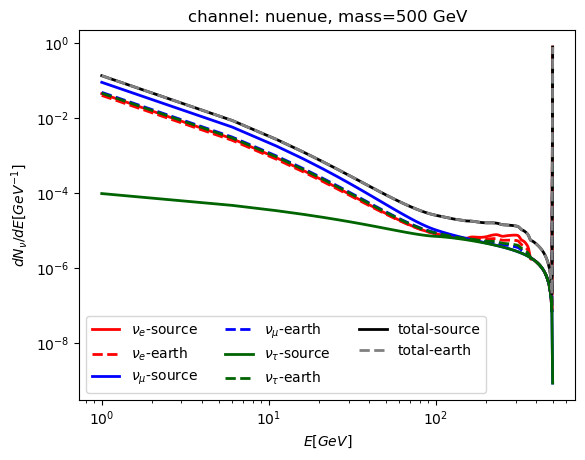

In [7]:
# Compute Rate at source and earth
Charon_Source = Rate.SpectraCharon()
Charon_Earth = Rate.SpectraCharon_nuSQUIDS()


# style and color for plots:
labels={"nu_e":r"$\nu_e$", "nu_mu":r"$\nu_\mu$", "nu_tau":r"$\nu_\tau$"}
colors={"nu_e":"red","nu_mu":"blue", "nu_tau":"darkgreen" }



for flv in ["nu_e", "nu_mu", "nu_tau"]:
    # plt.plot(PPPC4_Source[flv]["E"], PPPC4_Source[flv]["dNdE"], linestyle="-.", color=colors[flv], label=labels[flv], marker='o')
    plt.plot(Charon_Source[flv]["E"], Charon_Source[flv]["dNdE"], linewidth=2, linestyle="-", color=colors[flv], label=labels[flv]+'-source')#, marker='+')
    # plt.plot(PPPC4_Earth[flv]["E"], PPPC4_Earth[flv]["dNdE"], linewidth=2, linestyle="--", color=colors[flv], label=labels[flv], marker='*')
    plt.plot(Charon_Earth[flv]["E"], Charon_Earth[flv]["dNdE"], linewidth=2, linestyle="--", color=colors[flv], label=labels[flv]+'-earth')#, marker='*')

source = Charon_Source['nu_e']["dNdE"] + Charon_Source['nu_mu']["dNdE"] + Charon_Source['nu_tau']["dNdE"]
earth = Charon_Earth['nu_e']["dNdE"] + Charon_Earth['nu_mu']["dNdE"] + Charon_Earth['nu_tau']["dNdE"]
plt.plot(Charon_Source['nu_e']["E"], source, linewidth=2, linestyle="-", color='black', label='total-source')#, marker='+')
plt.plot(Charon_Source['nu_e']["E"], earth, linewidth=2, linestyle="--", color='gray', label='total-earth')#, marker='*')

plt.semilogy()
# plt.ylim(1e-7, 1)
plt.semilogx()
plt.xlabel(r"$E [GeV]$")
plt.ylabel(r"$dN_\nu/dE [GeV^{-1}]$")
plt.title("channel: {}, mass={} GeV".format(channel, mass))
plt.legend(ncol=3)


<font color="darkmagenta"> Spectra PPPC4 vs Charon </font>

Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


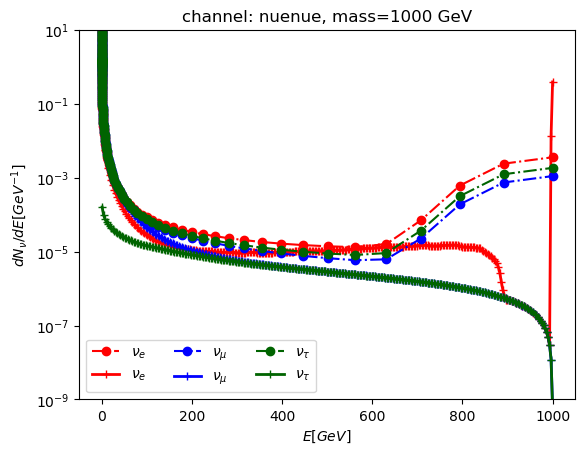

In [8]:
# Create NuRate object:
mass=1000
channel="nuenue"

process="ann"
Rate = NuSpectra(mass, channel, process, logscale=False)
Rate.nodes=300
Rate.bins=300
# Rate.logscale=True

# Rate.interactions=True
# Compute Rate
PPPC4 = Rate.SpectraPPPC4_AvgOsc()
Charon = Rate.SpectraCharon()

# style and color for plots:
labels={"nu_e":r"$\nu_e$", "nu_mu":r"$\nu_\mu$", "nu_tau":r"$\nu_\tau$"}
colors={"nu_e":"red","nu_mu":"blue", "nu_tau":"darkgreen" }
for flv in ["nu_e", "nu_mu", "nu_tau"]:
    plt.plot(PPPC4[flv]["E"], PPPC4[flv]["dNdE"], linestyle="-.", color=colors[flv], label=labels[flv], marker='o')
    plt.plot(Charon[flv]["E"], Charon[flv]["dNdE"], linewidth=2, linestyle="-", color=colors[flv], label=labels[flv], marker='+')
plt.semilogy()
plt.ylim(1e-9, 10)
# plt.semilogx()
plt.xlabel(r"$E [GeV]$")
plt.ylabel(r"$dN_\nu/dE [GeV^{-1}]$")
plt.title("channel: {}, mass={} GeV".format(channel, mass))
plt.legend(ncol=3)

Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/Spectra_PYTHIA.hdf5
Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/Spectra_PYTHIA.hdf5
Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/Spectra_PYTHIA.hdf5
Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/Spectra_PYTHIA.hdf5
Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/Spectra_PYTHIA.hdf5
Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/Spectra_PYTHIA.hdf5
Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/Spectra_PYTHIA.hdf5
Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/Spectra_PYTH

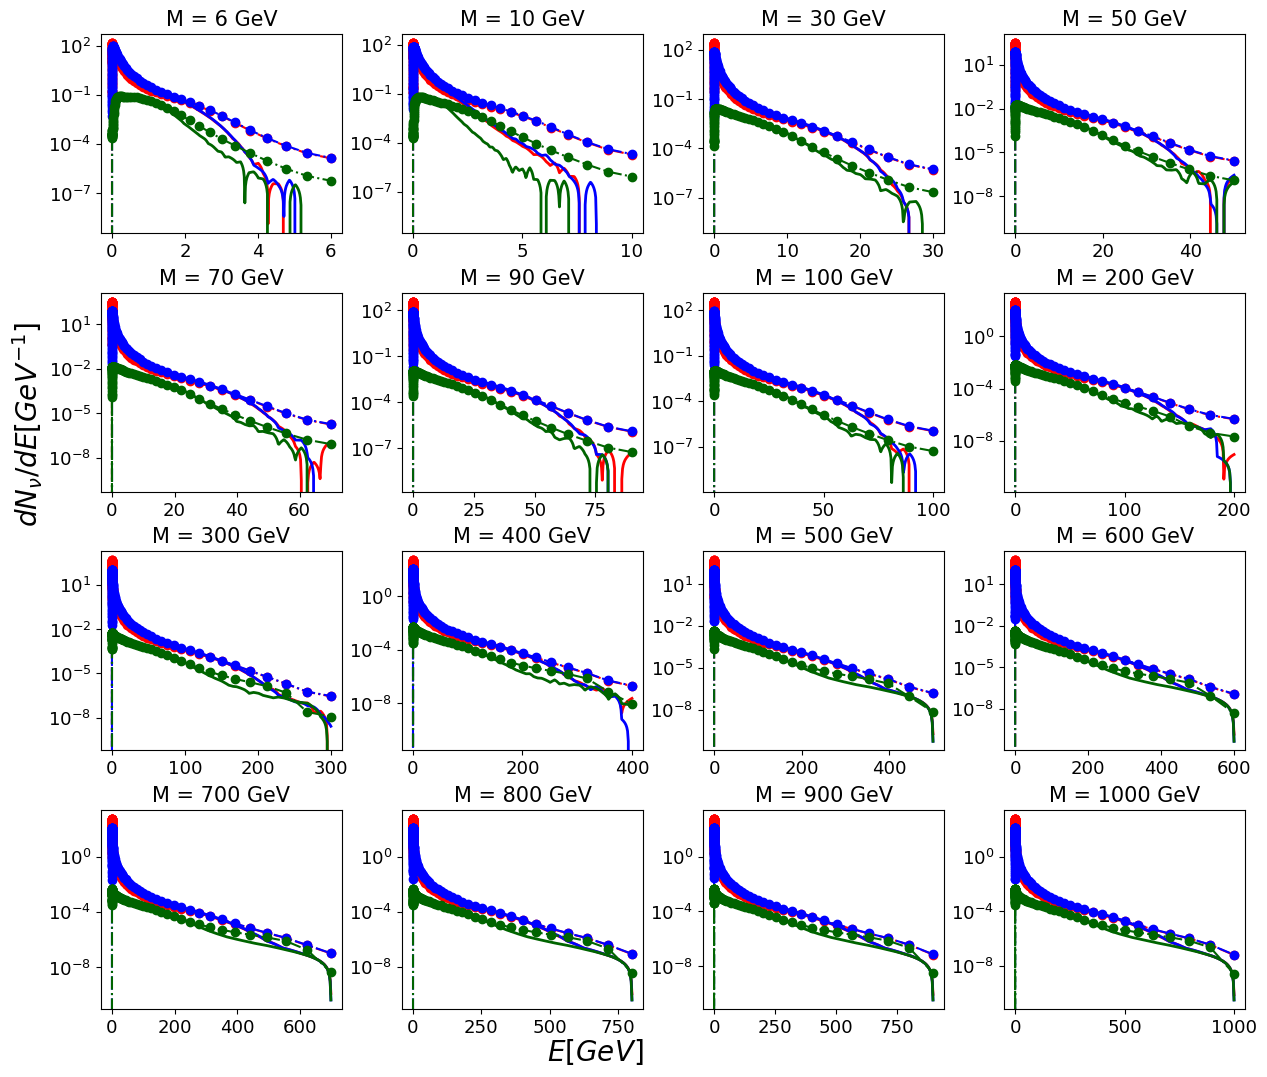

In [9]:
# Comparison on multiple masses
plt.rcParams.update({'font.size': 13})
plt.rcParams['figure.figsize'] = [13, 13]
channel='bb'
nuflv='nu_e'
process='ann'
fig, axs = plt.subplots(4,4)
masses = [6, 10, 30, 50, 70, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
im = 0

# recall threshold:
#Mass of the final state particles
p_mass = {'bb':4.18,'WW':80.379,'tautau':1.776,'mumu':105e-3, "nunu":0., "nuenue":0., "numunumu":0., "nutaunutau":0.}


# compute spectra:
spectra = NuSpectra(mass, channel, process, logscale=False)

labels={"nu_e":r"$\nu_e$", "nu_mu":r"$\nu_\mu$", "nu_tau":r"$\nu_\tau$"}
colors={"nu_e":"red","nu_mu":"blue", "nu_tau":"darkgreen" }
for ix in range(0, 4):
    for iy in range(0, 4):
        if masses[im] < p_mass[channel]:
            axs[ix, iy].plot(0, 0, label='Charon')
            axs[ix, iy].plot(0, 0, linestyle='-.', label='PPPC4')
            im+=1
            continue
        spectra.mass=masses[im]
        spectra.Emax=masses[im]
        PPPC4 = spectra.SpectraPPPC4()
        Charon = spectra.SpectraCharon()
        for flv in ["nu_e", "nu_mu", "nu_tau"]:
            axs[ix, iy].plot(PPPC4[flv]["E"], PPPC4[flv]["dNdE"], linestyle="-.", color=colors[flv], label=labels[flv], marker='o')
            axs[ix, iy].plot(Charon[flv]["E"], Charon[flv]["dNdE"], linewidth=2, linestyle="-", color=colors[flv], label=labels[flv], marker='')

        axs[ix, iy].set_title("M = {} GeV".format(masses[im]), fontsize=15)
        axs[ix, iy].semilogy()
        im+=1

plt.subplots_adjust(left=0.12,
                    bottom=0.05, 
                    right=1., 
                    top=0.8, 
                    wspace=0.25, 
                    hspace=0.3)
fig.text(0.5, 0.01, r"$E [GeV]$", ha='center', fontsize=20)
fig.text(0.05, 0.5, r"$dN_\nu/dE [GeV^{-1}]$", va='center', rotation='vertical', fontsize=20)
# lines, labels = fig.axes[-1].get_legend_handles_labels()
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))



Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/Spectra_PYTHIA.hdf5
Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/Spectra_PYTHIA.hdf5
Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/Spectra_PYTHIA.hdf5
Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/Spectra_PYTHIA.hdf5
Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux

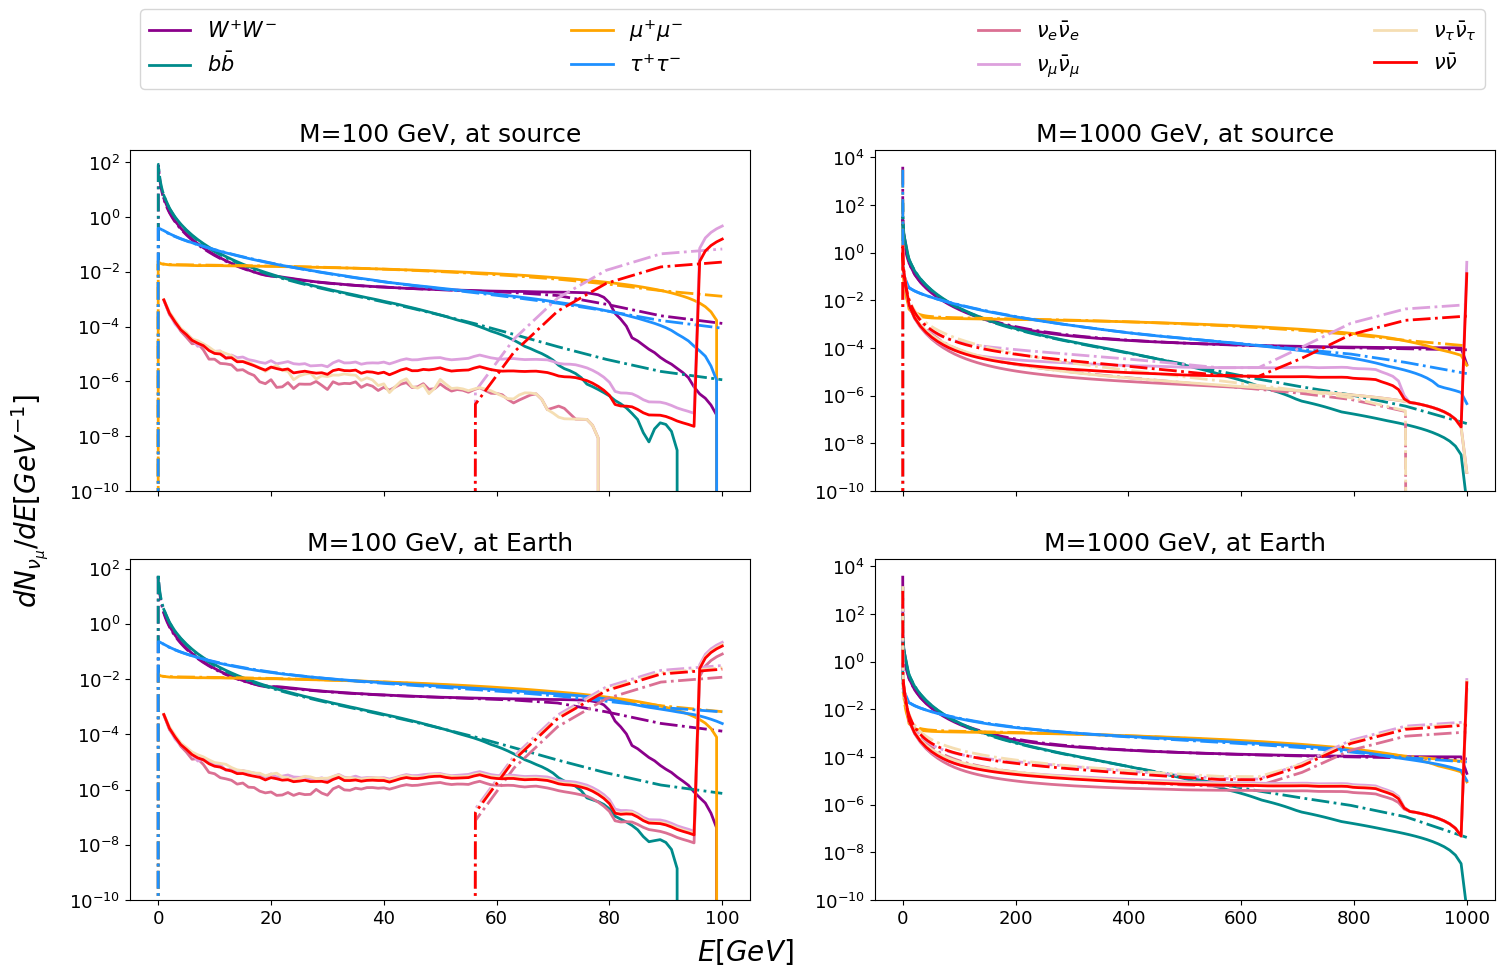

In [10]:
# channels and masses show in the plots:
channels = ["WW", "bb", "mumu", "tautau", "nuenue","numunumu","nutaunutau", "nunu"]
# channels = ["numunumu"]
mass = [100, 1000]
nu_type =  'nu_mu' #'nu_e' #'nu_tau' #nu_e_bar' #'nu_mu_bar' #'nu_tau_bar' #'nu_tau' #'nu_mu' #

colors = {"WW":"darkmagenta","tautau":"dodgerblue","mumu":"orange","bb":"darkcyan","nuenue":"palevioletred","numunumu":"plum","nutaunutau":"wheat", "nunu":"red"}
legends = {"WW":r"$W^{+}W^{-}$","tautau":r"$\tau^{+}\tau^{-}$","mumu":r"$\mu^{+}\mu^{-}$","bb":r"$b\bar{b}$","nuenue":r"$\nu_e\bar{\nu}_e$","numunumu":r"$\nu_\mu\bar{\nu}_\mu$","nutaunutau":r"$\nu_\tau\bar{\nu}_\tau$", "nunu":r"$\nu \bar{\nu}$"}
labels_nutype = {'nu_e':r"$\nu_{e}$",'nu_mu':r"$\nu_{\mu}$",'nu_tau':r"$\nu_{\tau}$",'nu_e_bar':r"$\bar{\nu}_{e}$",'nu_mu_bar':r"$\bar{\nu}_{\mu}$",'nu_tau_bar':r"$\bar{\nu}_{\tau}$"}

Rate.nodes=100
Rate.bins=100
Charon_Source_ann=dict()
Charon_Earth_ann=dict()
PPPC4_Source_ann=dict()
PPPC4_Earth_ann=dict()

for ch in channels:
    Charon_Source_ann[ch]=dict()
    Charon_Earth_ann[ch]=dict()
    PPPC4_Source_ann[ch]=dict()
    PPPC4_Earth_ann[ch]=dict()
    Rate.channel=ch
    for m in mass:
        Rate.mass=m
        Rate.Emax=m
        Charon_Source_ann[ch][str(m)] = Rate.SpectraCharon()
        Charon_Earth_ann[ch][str(m)] = Rate.SpectraCharon_nuSQUIDS()
        PPPC4_Source_ann[ch][str(m)] = Rate.SpectraPPPC4()
        PPPC4_Earth_ann[ch][str(m)] = Rate.SpectraPPPC4_AvgOsc()


Charon = [Charon_Source_ann, Charon_Earth_ann]
PPPC4 = [PPPC4_Source_ann, PPPC4_Earth_ann]
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
    
plt.rcParams['figure.figsize'] = [15, 10]
fig, axs = plt.subplots(2, 2, sharex='col')

# Spectra:
for i in range(0, len(mass)): # 2 mass: 100 (left), 1000 (right)
    for j in range(0, 2): # at Source (upper), at Earth (lower)
        for channel in channels:
            axs[j,i].plot(Charon[j][channel][str(mass[i])][nu_type]["E"], Charon[j][channel][str(mass[i])][nu_type]["dNdE"],
                        linewidth=2.0,label=legends[channel],color=colors[channel])
            axs[j,i].plot(PPPC4[j][channel][str(mass[i])][nu_type]["E"], PPPC4[j][channel][str(mass[i])][nu_type]["dNdE"],
                        linewidth=2.0,color=colors[channel], ls='-.')            
        axs[j,i].semilogy()
        axs[j,i].set_ylim(1e-10)
        axs[j,i].set_title("M={} GeV, at {}".format(str(mass[i]), "source" if (j==0) else "Earth" ), fontsize=18)

# for legend just to show charon lines
lines, labels = fig.axes[-1].get_legend_handles_labels()     

fig.text(0.5, 0.04, r"$E [GeV]$", ha='center', fontsize=20)
fig.text(0.01, 0.5, r"$dN_{\nu_\mu}/dE [GeV^{-1}]$", va='center', rotation='vertical', fontsize=20)
fig.legend(lines, labels, bbox_to_anchor=(0.09, 0.9, 0.91, 0.101), ncol=4,loc='upper left', mode="expand", fontsize=15)
# fig.tight_layout()
plt.subplots_adjust(left=0.09,
                    bottom=0.1, 
                    right=1., 
                    top=0.85, 
                    wspace=0.2, 
                    hspace=0.2)
plt.show()

Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/Spectra_PYTHIA.hdf5
Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/Spectra_PYTHIA.hdf5
Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/Spectra_PYTHIA.hdf5
Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/Spectra_PYTHIA.hdf5
Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/Spectra_PYTHIA.hdf5
Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/Spectra_PYTHIA.hdf5
Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/Spectra_PYTHIA.hdf5
Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/Spectra_PYTH

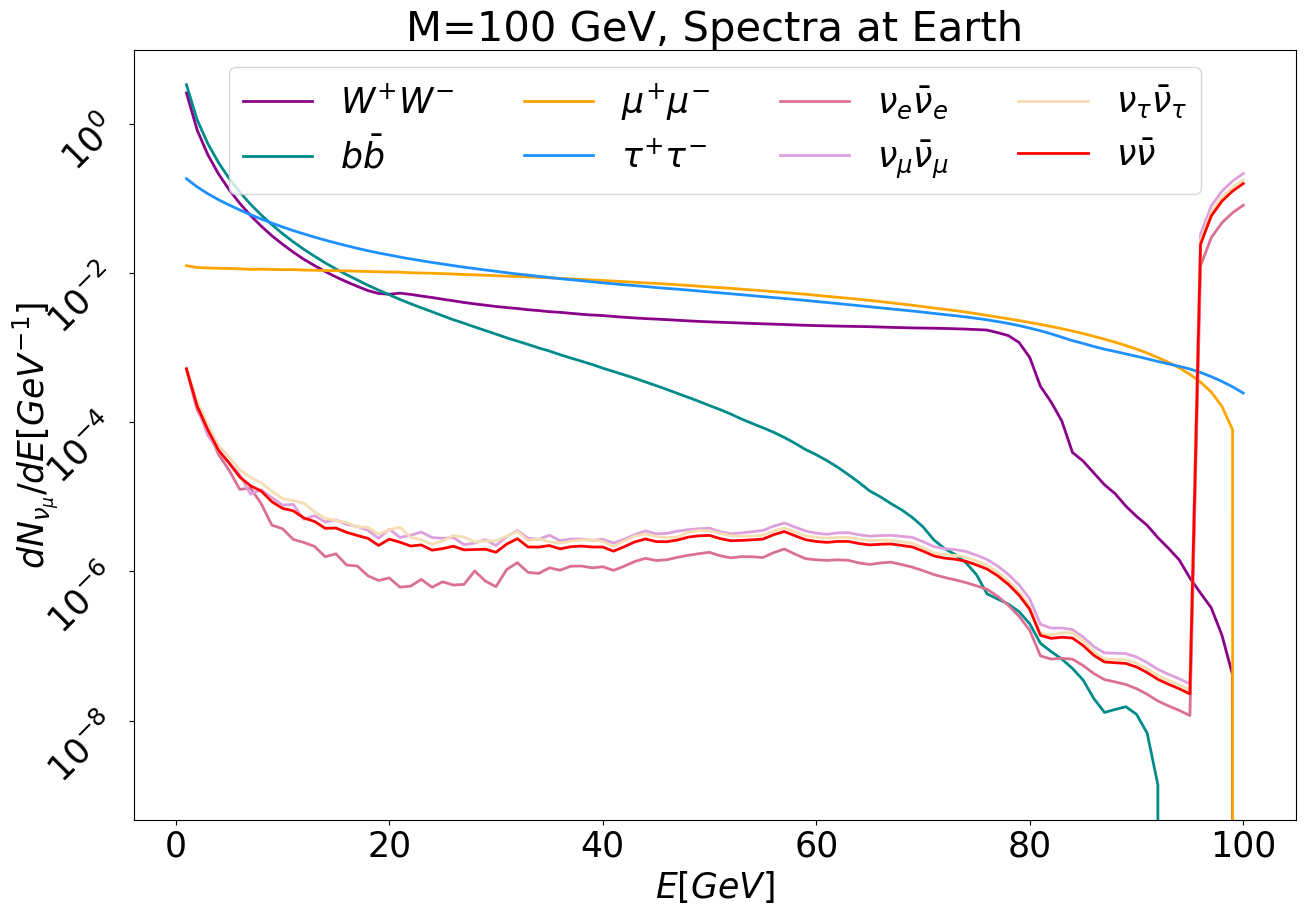

In [11]:
# channels and masses show in the plots:
channels = ["WW", "bb", "mumu", "tautau", "nuenue","numunumu","nutaunutau", "nunu"]
# channels = ["numunumu"]
mass = 100
nu_type =  'nu_mu' #'nu_e' #'nu_tau' #nu_e_bar' #'nu_mu_bar' #'nu_tau_bar' #'nu_tau' #'nu_mu' #

colors = {"WW":"darkmagenta","tautau":"dodgerblue","mumu":"orange","bb":"darkcyan","nuenue":"palevioletred","numunumu":"plum","nutaunutau":"wheat", "nunu":"red"}
legends = {"WW":r"$W^{+}W^{-}$","tautau":r"$\tau^{+}\tau^{-}$","mumu":r"$\mu^{+}\mu^{-}$","bb":r"$b\bar{b}$","nuenue":r"$\nu_e\bar{\nu}_e$","numunumu":r"$\nu_\mu\bar{\nu}_\mu$","nutaunutau":r"$\nu_\tau\bar{\nu}_\tau$", "nunu":r"$\nu \bar{\nu}$"}
labels_nutype = {'nu_e':r"$\nu_{e}$",'nu_mu':r"$\nu_{\mu}$",'nu_tau':r"$\nu_{\tau}$",'nu_e_bar':r"$\bar{\nu}_{e}$",'nu_mu_bar':r"$\bar{\nu}_{\mu}$",'nu_tau_bar':r"$\bar{\nu}_{\tau}$"}

Rate.nodes=100
Rate.bins=100
Charon_Source_ann=dict()
Charon_Earth_ann=dict()
PPPC4_Source_ann=dict()
PPPC4_Earth_ann=dict()

for ch in channels:
    Charon_Source_ann[ch]=dict()
    Charon_Earth_ann[ch]=dict()
    PPPC4_Source_ann[ch]=dict()
    PPPC4_Earth_ann[ch]=dict()
    Rate.channel=ch

    Rate.mass=mass
    Rate.Emax=mass
    Charon_Source_ann[ch] = Rate.SpectraCharon()
    Charon_Earth_ann[ch] = Rate.SpectraCharon_nuSQUIDS()


# Spectra:
for channel in channels:
    plt.plot(Charon_Earth_ann[channel][nu_type]["E"], Charon_Earth_ann[channel][nu_type]["dNdE"],
                linewidth=2.0,label=legends[channel],color=colors[channel])
    # axs[j,i].plot(PPPC4[j][channel][str(mass[i])][nu_type]["E"], PPPC4[j][channel][str(mass[i])][nu_type]["dNdE"],
    #             linewidth=2.0,color=colors[channel], ls='-.')            
plt.semilogy()
# plt.set_ylim(1e-10)
plt.title("M={} GeV, Spectra at {}".format(str(mass), "Earth" ), fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25, rotation=45)


# for legend just to show charon lines
# lines, labels = fig.axes[-1].get_legend_handles_labels()     

plt.xlabel(r"$E [GeV]$", ha='center', fontsize=25)
plt.ylabel(r"$dN_{\nu_\mu}/dE [GeV^{-1}]$", va='center', rotation='vertical', fontsize=25)
# fig.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=5)

plt.legend(ncol=4, fontsize=25)